# Pandas Test - Real life Exercise

In [3]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [90]:
import pandas as pd

For visualizations:

In [91]:
import cufflinks as cf; cf.go_offline()
import plotly_express as px

## About the data

The data you are about to load is coming from an Ad recommentation system of the company InBrain. InBrain is a adTech company and specalize in next-level ad recommendation.  
The company has two major products - one giving high quality recommendation while the other is giving an highly yielding recommendation. Inbrain custormers are sending requests, asking for either of the products. 

Once a week, the company is doing an internal quality assements, and sends a sample of its traffic requests to external annotation process, in which the annotators are trained to manually decided whether the recommended Ad is a succes or not. The data contains information about the ad (**ad_id**), the sampled week (**week_id**), the requester company (**requester**), the region of operation (**region**), the recommendation type (Quality/Yield, **recommendation_type**) and the recommendation provider algorithm (**rec_provider**). The annotators are marking whether the recommendation is meeting the Quality/Yield standards (**is_success**) and whether or not the recommendation is severly defected (**is_sever**)

See a sample below:

In [92]:
ad_recs_annotated = pd.read_csv('data/Final assigment/ad_annotations.csv')
ad_recs_annotated.sample(5)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
186963,2021-week_46,AD08KH8MTS,iDreamsky Technology,DE,yes,NaN,Qality,ManualY
256953,2021-week_50,AD08H6ZQWF,Extreme DA,US,yes,NaN,Yield,RNNY
320473,2022-week_04,AD08L8VJWC,G-mode,IN,yes,NaN,Qality,UserPopQ
318520,2022-week_04,AD008PAOAW,Fancy,GB,yes,NaN,Qality,DNNQ
339685,2022-week_05,AD00EQ6988,Fancy,US,no,True,Qality,DNNQ


In [93]:
most_pop_ad= ad_recs_annotated.ad_id.value_counts().idxmax()

In [94]:
q = f'ad_id == "{most_pop_ad}"'
q

'ad_id == "AD07PFFMP9"'

In [95]:
ad_recs_annotated.query('ad_id == @most_pop_ad')

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider
7031,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
7032,2021-week_33,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
20010,2021-week_34,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
20011,2021-week_34,AD07PFFMP9,Puentes Company,IN,yes,NaN,Yield,ManualQ
35214,2021-week_35,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
...,...,...,...,...,...,...,...,...
363533,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ
363534,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ
363535,2022-week_52,AD07PFFMP9,Bizanga,IN,yes,NaN,Yield,ManualQ
363536,2022-week_52,AD07PFFMP9,MoJoe Brewing Company,IN,yes,NaN,Yield,ManualQ


Your job, as the new and only data scientist of the company, is to get familiar with the the data, show week-over-week trends and produce insightfull graphs as a preparation to a full blown BI dashboard.

## Questions

### Data Modifications

1. Add a column with the sample year
1. Add a column with the sample quarter (google how to)
1. Add a new success column with values 1 and 0 for yes and no 
1. Are there any NaNs in the is_sever column? Count how many and create a new column with NaNs filled as False. Check that indeed the new column contaion no NaNs. 
1. Capitlize (first letter only) the is_success column (Inplace)

In [26]:
#1
ad_recs_annotated['week_id'] = pd.to_datetime(ad_recs_annotated['week_id'] + '-1', format='%Y-week_%U-%w')
ad_recs_annotated['sample_year'] = ad_recs_annotated['week_id'].dt.year

In [27]:
#2
ad_recs_annotated['quarter'] = ad_recs_annotated['week_id'].dt.quarter

In [28]:
#3
ad_recs_annotated['success'] = ad_recs_annotated['is_success'].map({'yes': 1, 'no': 0})

In [29]:
#4
ad_recs_annotated['is_sever_filled'] = ad_recs_annotated['is_sever'].fillna(False)
num_nans_filled = ad_recs_annotated['is_sever_filled'].isna().sum()

In [30]:
#5
ad_recs_annotated['is_success'] = ad_recs_annotated['is_success'].str.title()

### Subset selection

for each question, sub-select the data by using the conditional selection (`[]`) and the `.query` API. Use `.shape` on the subselection to obtain the result.  
For example:
`df.query('some_condition').shape`

1. How many requests are there in US region? 
2. How many **successful** requests are there in US region? 
3. How many **successful** requests are there in US region, on week 52?
4. How many requests where delivered by DNNQ, RNNY and UserPopQ together? 
5. How many requests where delivered by rule based providers? 
6. Select only the requests from 2021 - How many are there? 
7. Select the reqeusts from week 30 to week 40 - How many are there? 
8. Select all the data that comes from the most popular Ad
9. Select all the data that comes from the least popular provider
10. Select the data in which is_sever is None. How big is it? 
11. Select the data in which the requester is a 3 word company
12. Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
13. Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30

In [31]:
#1.How many requests are there in US region?
ad_recs_annotated.query("region == 'US'").shape[0]

103846

In [32]:
#2.How many successful requests are there in US region?
ad_recs_annotated.query("region == 'US' and is_success == 'Yes'").shape[0]

88918

In [33]:
#3.How many successful requests are there in US region, on week 52?
ad_recs_annotated[(ad_recs_annotated['region'] == 'US') & (ad_recs_annotated['is_success'] == 'Yes') & (ad_recs_annotated['week_id'].dt.isocalendar().week == 52)].shape[0]

3342

In [34]:
#4.How many requests where delivered by DNNQ, RNNY and UserPopQ together?
ad_recs_annotated.query("rec_provider in ('DNNQ', 'RNNY', 'UserPopQ')").shape[0]

200093

In [35]:
#5.How many requests where delivered by rule based providers?
unique_providers = ad_recs_annotated['rec_provider'].unique()
print(unique_providers)

total_count = sum(ad_recs_annotated['rec_provider'].isin(['RuleBased', 'RuleBasedY']))
total_count

['DNNQ' 'DNNY' 'BooksQ' 'UserPopQ' 'UserPopY' 'RuleBasedY' 'ManualY'
 'ManualQ' 'BooksY' 'XGBQ' 'XGBY' 'RNNQ' 'RNNY' 'RuleBased'
 'UserPopSelectionQ' 'UserPopSelectionY']


28336

In [37]:
#6.Select only the requests from 2021 - How many are there
num_requests_2021 = len(ad_recs_annotated[ad_recs_annotated['sample_year'] == 2021])
num_requests_2021

271615

In [38]:
#7.Select the reqeusts from week 30 to week 40 - How many are there?
num_requests_week_30_to_40 = len(ad_recs_annotated[(ad_recs_annotated['week_id'] >= '2021-07-26') & (ad_recs_annotated['week_id'] <= '2021-10-10')])

In [39]:
#8.Select all the data that comes from the most popular Ad
data_from_most_popular_ad = ad_recs_annotated[ad_recs_annotated['ad_id'] == ad_recs_annotated['ad_id'].value_counts().idxmax()]

In [40]:
#9.Select all the data that comes from the least popular provider
data_from_least_popular_provider = ad_recs_annotated[ad_recs_annotated['rec_provider'].value_counts().idxmin() == ad_recs_annotated['rec_provider']]

In [41]:
#10.Select the data in which is_sever is None. How big is it?
size_of_data_with_none_is_sever = len(ad_recs_annotated[ad_recs_annotated['is_sever'].isnull()])

In [42]:
#11.Select the data in which the requester is a 3 word company
data_from_3_word_companies = ad_recs_annotated[ad_recs_annotated['requester'].str.count(' ') == 2]

In [43]:
#12.Select the data in which the requester is a 3 word company, and the ad_id has the letter 6 in it
three_word_companies_six_ad_id = ad_recs_annotated[(ad_recs_annotated['requester'].str.count(' ') == 2) & (ad_recs_annotated['ad_id'].str.contains('6'))]

In [45]:
#13.Select the data in which the requester is a 3 word company, and the multiplication of all the numbers in the ad_id is bigger than 30
result = ad_recs_annotated[(ad_recs_annotated['requester'].str.count(' ') == 2) & 
         ad_recs_annotated['ad_id'].astype(str).apply(lambda x: eval('*'.join(filter(str.isdigit, x)))) > 30]
result

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,sample_year,quarter,success,is_sever_filled


### Analysis

1. How many weeks available in the data? Are there any missing weeks? 
2. How many regions available in the data? Are there any missing weeks per region? 
1. How many ads are being sent to annotation in each region per week?
1. How many None values are there in is_sever column? 
1. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
1. Are there ads that are being sent in more than one week?
   1. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
   2. What are the weeks that the ad from above was sent in? 
   3. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
1. When is_sever is None, what is the number of successful requests? What is the number of non-successful requests? What do you learn from it about the reason for Nones in the first place? 
1. Per each region, What is the Quality/Yield traffic proportion WoW? 
1. How many different reqeusters are there? 
1. Which are the top 5 requesters per region? 
1. Which are the different rec_proivders?
1. Are there different rec providers per region? 
1. Are there different rec providers per rec type?
1. What are the notation rules distinguishing between quality vs yielding providers?
1. Which is the most successful region of operation? 
1. Which is the most successful rec provider per each region? 
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider
1. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
1. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
1. Present WoW table/graph with success rate and CI (see image below) per region
1. Present WoW table/graph with success rate and CI (see image below) per region and rec type
1. Present WoW table/graph with success rate and CI (see image below) per region and rec provider
1. Which are the requester to which we succeed the most?
1. Which are the requester to which we produce the most critical defects?
1. What is the overall success rate trend over time? 
1. What is the overall sever defect rate trend over time? 
1. Preset a WoW graph showing the number of requests per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients
1. Preset a WoW graph showing the **requests proportion** per customer in each region (hint: [use stacked bars](https://plotly.com/python/bar-charts/)), from it:
  1. Identify major traffic shape changes (addition/removal) of major clients


In [32]:
#1. How many weeks available in the data? Are there any missing weeks? 
week_ids = pd.to_datetime(ad_recs_annotated['week_id'])
num_weeks = len(week_ids)
min_week = week_ids.min()
max_week = week_ids.max()
expected_weeks = pd.date_range(start=min_week, end=max_week, freq='7D')

missing_weeks = expected_weeks.difference(week_ids)
num_missing_weeks = len(missing_weeks)

print(f"Number of available weeks: {num_weeks}")
print(f"Number of missing weeks: {num_missing_weeks}")

Number of available weeks: 373788
Number of missing weeks: 46


In [51]:
#2. How many regions available in the data? Are there any missing weeks per region? 
# Count unique regions
num_regions = ad_recs_annotated['region'].nunique()
# Pivot table count number of weeks per region
weeks_per_region = pd.pivot_table(ad_recs_annotated, index='region', values='week_id', aggfunc=pd.Series.nunique)
# Check for missing weeks per region
missing_weeks_per_region = ad_recs_annotated.groupby('region')['week_id'].apply(lambda x: pd.date_range(start=x.min(), end=x.max(), freq='W').difference(x)).apply(len)

In [52]:
#3. How many ads are being sent to annotation in each region per week?
ad_counts = ad_recs_annotated.groupby(['week_id', 'region'])['ad_id'].count()
print(ad_counts)

week_id     region
2021-08-16  DE        2395
            GB        3180
            IN        3196
            JP        1611
            US        3974
                      ... 
2022-12-26  DE        2382
            GB        3185
            IN        3183
            JP        3182
            US        3998
Name: ad_id, Length: 129, dtype: int64


In [55]:
#4. How many None values are there in is_sever column?
num_none_values = ad_recs_annotated['is_sever'].isna().sum()
num_none_values

304195

In [58]:
#5. Are ads being sent more than one time in a given week? what is the ad_id that was sent the most in a given week? (e.g. ad X where sent 50 times in week Y)
# Group the dataframe by week_id and ad_id and count the number of occurrences
ad_counts = ad_recs_annotated.groupby(['week_id', 'ad_id'])['ad_id'].count()
# Check if any ad was sent more than once in a given week
if (ad_counts > 1).any():
    print("more than once")
# Find the ad_id that was sent the most in a given week
most_sent_ad = ad_counts.groupby('week_id').idxmax().reset_index()
print("ad_id sent the most in a given week: \n", most_sent_ad)

more than once
ad_id sent the most in a given week: 
       week_id                              ad_id
0  2021-08-16  (2021-08-16 00:00:00, AD07FM8DDG)
1  2021-08-23   (2021-08-23 00:00:00, AD079Q9D7)
2  2021-08-30  (2021-08-30 00:00:00, AD07TTH8TM)
3  2021-09-06  (2021-09-06 00:00:00, AD088J88G6)
4  2021-09-13  (2021-09-13 00:00:00, AD008MZV8O)
5  2021-09-20  (2021-09-20 00:00:00, AD088J88G6)
6  2021-09-27  (2021-09-27 00:00:00, AD008HD0WE)
7  2021-10-04  (2021-10-04 00:00:00, AD098SWYF6)
8  2021-10-11  (2021-10-11 00:00:00, AD098SWYF6)
9  2021-10-18  (2021-10-18 00:00:00, AD008IR8RJ)
10 2021-10-25  (2021-10-25 00:00:00, AD087J8WAN)
11 2021-11-01  (2021-11-01 00:00:00, AD08XJCMGL)
12 2021-11-08  (2021-11-08 00:00:00, AD08FJSGY8)
13 2021-11-15  (2021-11-15 00:00:00, AD08C8RR8J)
14 2021-11-22  (2021-11-22 00:00:00, AD08C8RR8J)
15 2021-11-29  (2021-11-29 00:00:00, AD09CH6RYY)
16 2021-12-06  (2021-12-06 00:00:00, AD08FJSGY8)
17 2021-12-13  (2021-12-13 00:00:00, AD0986H87S)
18 2021-12-20  

In [62]:
#6. Are there ads that are being sent in more than one week?

#a. Which is the ad that was sent in most amount of weeks (e.g. ad X where sent in Y different weeks)
most_sent_ad = ad_recs_annotated['ad_id'].value_counts().index[0]
print("ad sent in the most number of weeks: ", most_sent_ad)

#b. What are the weeks that the ad from above was sent in?
weeks_sent = ad_recs_annotated.loc[ad_recs_annotated['ad_id'] == most_sent_ad, 'week_id'].unique()
print("The weeks in which the most sent ad was sent: ", weeks_sent)

#c. Is there an Ad that was succsefull in one week, but not succesfful in a different week? Show one.
ad_success = ad_recs_annotated.groupby(['ad_id', 'week_id'])['is_success'].nunique()
ad_with_diff_success = ad_success[ad_success > 1].reset_index()['ad_id'].iloc[0]
print(f"The ad {ad_with_diff_success} successful in one week but not in another.")

ad sent in the most number of weeks:  AD07PFFMP9
The weeks in which the most sent ad was sent:  ['2021-08-16T00:00:00.000000000' '2021-08-23T00:00:00.000000000'
 '2021-08-30T00:00:00.000000000' '2021-09-06T00:00:00.000000000'
 '2021-09-13T00:00:00.000000000' '2021-09-20T00:00:00.000000000'
 '2021-09-27T00:00:00.000000000' '2021-10-04T00:00:00.000000000'
 '2021-10-11T00:00:00.000000000' '2021-10-18T00:00:00.000000000'
 '2021-10-25T00:00:00.000000000' '2021-11-01T00:00:00.000000000'
 '2021-11-08T00:00:00.000000000' '2021-11-15T00:00:00.000000000'
 '2021-11-22T00:00:00.000000000' '2021-11-29T00:00:00.000000000'
 '2021-12-06T00:00:00.000000000' '2021-12-13T00:00:00.000000000'
 '2021-12-20T00:00:00.000000000' '2022-01-03T00:00:00.000000000'
 '2022-01-10T00:00:00.000000000' '2022-01-17T00:00:00.000000000'
 '2022-01-24T00:00:00.000000000' '2022-01-31T00:00:00.000000000'
 '2022-02-07T00:00:00.000000000' '2022-12-26T00:00:00.000000000']
The ad AD0008E8O8 successful in one week but not in anothe

In [68]:
#7. When is_sever is None, what is the number of successful requests?
num_success_when_is_sever_none = ad_recs_annotated.loc[ad_recs_annotated['is_sever'].isnull(), 'is_success'].eq('yes').sum()
# כשיש נון בחמור, הצלחה 0

# What is the number of non-successful requests? 
num_non_success_none = ad_recs_annotated.loc[ad_recs_annotated['is_sever'].isnull(), 'is_success'].eq('no').sum()
# כשיש נון בחמור, אי-הצלחה 0

# What do you learn from it about the reason for Nones in the first place?
# כשיש נון בחמור, לא ניתן להסיק לגבי הצלחה

In [82]:
#8. שאלה לא ברורה Per each region, What is the Quality/Yield traffic proportion WoW?

# filter for only Quality and Yield recommendations
filtered_df = ad_recs_annotated[(ad_recs_annotated["recommendation_type"] == "Quality") | (ad_recs_annotated["recommendation_type"] == "Yield")]

# group by region and week_id and count the number of Quality and Yield recommendations
grouped_df = filtered_df.groupby(["region", "week_id", "recommendation_type"])["ad_id"].count().reset_index()

# pivot the data to get Quality and Yield counts as separate columns
pivoted_df = grouped_df.pivot_table(values="ad_id", index=["region", "week_id"], columns="recommendation_type", fill_value=0)

# calculate the proportions and the WoW change
result_df = pivoted_df.groupby("region").apply(lambda x: x.pct_change().iloc[-1])
result_df

recommendation_type,Yield
region,
DE,0.994350
GB,1.929530
IN,0.335298
JP,1.464789
US,0.069758


In [84]:
#9. How many different reqeusters are there?
num_requesters = len(ad_recs_annotated["requester"].unique())
num_requesters

36

In [92]:
#10. Which are the top 5 requesters per region?

# group the data by region and requester and count the number of ad_ids in each group
grouped_df = ad_recs_annotated.groupby(["region", "requester"])["ad_id"].count().reset_index()

# sort the data by region and ad_id count in descending order
sorted_df = grouped_df.sort_values(["region", "ad_id"], ascending=[True, False])

# get the top 5 requesters for each region
result_df = sorted_df.groupby("region").head(5)

In [95]:
#11. Which are the different rec_proivders?
ad_recs_annotated['rec_provider'].nunique()

16

In [98]:
#12. Are there different rec providers per region?
ad_recs_annotated.groupby('region')['rec_provider'].nunique()

region
DE     9
GB    12
IN     6
JP     9
US    14
Name: rec_provider, dtype: int64

In [99]:
#13. Are there different rec providers per rec type?
ad_recs_annotated.groupby('recommendation_type')['rec_provider'].nunique()

recommendation_type
Qality    9
Yield     9
Name: rec_provider, dtype: int64

In [106]:
#14. What are the notation rules distinguishing between quality vs yielding providers?
ad_recs_annotated.groupby(['recommendation_type', 'rec_provider'])['region'].unique()

recommendation_type  rec_provider     
Qality               BooksQ                           [DE, US]
                     DNNQ                     [DE, GB, JP, US]
                     ManualQ              [DE, GB, IN, JP, US]
                     ManualY              [DE, GB, IN, JP, US]
                     RNNQ                             [GB, US]
                     RuleBased                    [GB, IN, US]
                     UserPopQ             [DE, GB, IN, JP, US]
                     UserPopSelectionQ                    [JP]
                     XGBQ                             [GB, US]
Yield                BooksY                           [DE, US]
                     DNNY                     [DE, GB, JP, US]
                     ManualQ              [DE, GB, IN, JP, US]
                     ManualY              [DE, GB, IN, JP, US]
                     RNNY                             [GB, US]
                     RuleBasedY           [DE, GB, IN, JP, US]
                

In [8]:
#15. Which is the most successful region of operation?
ad_recs_annotated[ad_recs_annotated['is_success'] == 'yes'].groupby('region').size().sort_values(ascending=False)

region
US    88918
GB    69509
IN    63355
DE    50624
JP    31800
dtype: int64

In [12]:
#16. Which is the most successful rec provider per each region?
ad_recs_annotated.query('is_success == "yes"').groupby('region')['rec_provider'].apply(lambda x: x.value_counts().idxmax())

region
DE        DNNQ
GB        DNNQ
IN    UserPopQ
JP        DNNQ
US        DNNY
Name: rec_provider, dtype: object

In [22]:
#17. Present a table with a success rate, sever defects rate and CI (for each metric) per region

import numpy as np
from scipy import stats

def confidence_interval(data):
    n = len(data)
    m, se = np.mean(data), stats.sem(data)
    h = se * stats.t.ppf((1 + 0.95) / 2, n - 1)
    return h

ad_recs_annotated['is_success_binary'] = ad_recs_annotated['is_success'].map({'yes': 1, 'no': 0}).fillna(0)
ad_recs_annotated['is_sever_binary'] = ad_recs_annotated['is_sever'].map({'True': 1, 'False': 0}).fillna(0)

ad_recs_annotated.groupby('region').agg(
    success_rate=('is_success_binary', 'mean'),
    success_ci=('is_success_binary', confidence_interval),
    sever_rate=('is_sever_binary', 'mean'),
    sever_ci=('is_sever_binary', confidence_interval)
)

,success_rate,success_ci,sever_rate,sever_ci
region,,,,
DE,0.814192,0.003057,0.0,0.0
GB,0.837619,0.002509,0.0,0.0
IN,0.761900,0.002895,0.0,0.0
JP,0.763927,0.004080,0.0,0.0
US,0.856249,0.002134,0.0,0.0


In [29]:
#18. Present a table with a success rate, sever defects rate and CI (for each metric) per rec provider

ad_recs_annotated.groupby('rec_provider').agg(
success_rate=('is_success_binary', 'mean'),
success_ci=('is_success_binary', confidence_interval),
sever_rate=('is_sever_binary', 'mean'),
sever_ci=('is_sever_binary', confidence_interval)
)

,success_rate,success_ci,sever_rate,sever_ci
rec_provider,,,,
BooksQ,0.836628,0.017489,0.0,0.0
BooksY,0.979759,0.004286,0.0,0.0
DNNQ,0.858376,0.001994,0.0,0.0
DNNY,0.886714,0.002925,0.0,0.0
ManualQ,0.953193,0.003519,0.0,0.0
ManualY,0.905651,0.012880,0.0,0.0
RNNQ,0.902540,0.004013,0.0,0.0
RNNY,0.919651,0.004722,0.0,0.0
RuleBased,0.967033,0.026187,0.0,0.0


In [28]:
#19. Present a table with a success rate, sever defects rate and CI (for each metric) per region and rec provider combinations
ad_recs_annotated.groupby(['region', 'rec_provider']).agg(
    success_rate=('is_success_binary', 'mean'),
    success_ci=('is_success_binary', confidence_interval),
    sever_rate=('is_sever_binary', 'mean'),
    sever_ci=('is_sever_binary', confidence_interval)
)

success_rate  success_ci  sever_rate  sever_ci
region rec_provider                                                     
DE     BooksQ                 0.799704    0.021353         0.0       0.0
       BooksY                 0.966587    0.009948         0.0       0.0
       DNNQ                   0.839114    0.003999         0.0       0.0
       DNNY                   0.917297    0.007337         0.0       0.0
       ManualQ                0.857438    0.022064         0.0       0.0
       ManualY                0.960331    0.015597         0.0       0.0
       RuleBasedY             0.633209    0.023536         0.0       0.0
       UserPopQ               0.731142    0.007054         0.0       0.0
       UserPopY               0.779469    0.014045         0.0       0.0
GB     DNNQ                   0.874127    0.003264         0.0       0.0
       DNNY                   0.857968    0.008025         0.0       0.0
       ManualQ                0.966574    0.007597         0.0       0.0
       ManualY                0.873418    0.027799         0.0       0.0
       RNNQ                   0.892515    0.005694         0.0       0.0
       RNNY                   0.872093    0.016656         0.0       0.0
       RuleBased              0.975000    0.050567         0.0       0.0
       RuleBasedY             0.376961    0.022110         0.0       0.0
       UserPopQ               0.672615    0.011172         0.0       0.0
       UserPopY               0.658952    0.022953         0.0       0.0
       XGBQ                   0.800788    0.008192         0.0       0.0
       XGBY                   0.862033    0.021809         0.0       0.0
IN     ManualQ                0.952390    0.005738         0.0       0.0
       ManualY                0.942222    0.030721         0.0       0.0
       RuleBased              0.857143    0.349559         0.0       0.0
       RuleBasedY             0.627986    0.007977         0.0       0.0
       UserPopQ               0.795474    0.004044         0.0       0.0
       UserPopY               0.744357    0.005376         0.0       0.0
JP     DNNQ                   0.818467    0.004820         0.0       0.0
       DNNY                   0.800985    0.012603         0.0       0.0
       ManualQ                0.934003    0.018477         0.0       0.0
       ManualY                0.544000    0.088528         0.0       0.0
       RuleBasedY             0.323764    0.036725         0.0       0.0
       UserPopQ               0.629256    0.010633         0.0       0.0
       UserPopSelectionQ      0.815060    0.015489         0.0       0.0
       UserPopSelectionY      0.857143    0.163218         0.0       0.0
       UserPopY               0.505447    0.026440         0.0       0.0
US     BooksQ                 0.972752    0.016735         0.0       0.0
       BooksY                 0.985482    0.004361         0.0       0.0
       DNNQ                   0.905650    0.003978         0.0       0.0
       DNNY                   0.899814    0.003482         0.0       0.0
       ManualQ                0.970414    0.004830         0.0       0.0
       ManualY                0.951477    0.019414         0.0       0.0
       RNNQ                   0.914396    0.005594         0.0       0.0
       RNNY                   0.926234    0.004845         0.0       0.0
       RuleBased              0.970370    0.028971         0.0       0.0
       RuleBasedY             0.541830    0.009788         0.0       0.0
       UserPopQ               0.673436    0.021553         0.0       0.0
       UserPopY               0.697534    0.010815         0.0       0.0
       XGBQ                   0.817919    0.013562         0.0       0.0
       XGBY                   0.872886    0.011350         0.0       0.0

In [30]:
#20. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type (Q/Y)
ad_recs_annotated.groupby('recommendation_type').agg(
    success_rate=('is_success_binary', 'mean'),
    success_ci=('is_success_binary', confidence_interval),
    sever_rate=('is_sever_binary', 'mean'),
    sever_ci=('is_sever_binary', confidence_interval)
)

,success_rate,success_ci,sever_rate,sever_ci
recommendation_type,,,,
Qality,0.830910,0.001510,0.0,0.0
Yield,0.784427,0.002176,0.0,0.0


In [31]:
#21. Present a table with a success rate, sever defects rate and CI (for each metric) per rec type and region
ad_recs_annotated.groupby(['recommendation_type', 'region']).agg(
    success_rate=('is_success_binary', 'mean'),
    success_ci=('is_success_binary', confidence_interval),
    sever_rate=('is_sever_binary', 'mean'),
    sever_ci=('is_sever_binary', confidence_interval)
)

success_rate  success_ci  sever_rate  sever_ci
recommendation_type region                                                
Qality              DE          0.806681    0.003451         0.0       0.0
                    GB          0.850367    0.002654         0.0       0.0
                    IN          0.806129    0.003834         0.0       0.0
                    JP          0.777806    0.004327         0.0       0.0
                    US          0.899070    0.002932         0.0       0.0
Yield               DE          0.845986    0.006491         0.0       0.0
                    GB          0.772476    0.007052         0.0       0.0
                    IN          0.719186    0.004283         0.0       0.0
                    JP          0.683988    0.011615         0.0       0.0
                    US          0.828812    0.002935         0.0       0.0

In [43]:
#22. Present WoW table/graph with success rate and CI (see image below) per region
# Compute success rate for each week and region
success_rates = ad_recs_annotated.groupby(['week_id', 'region']).agg(
    success_rate=('is_success_binary', 'mean')
)
# Compute WoW changes in success rate for each region
wow_success_rates = success_rates.groupby('region')['success_rate'].pct_change(periods=1).fillna(0)

# Compute 95% confidence intervals for success rates
ci_success_rates = success_rates.groupby('region')['success_rate'].apply(confidence_interval).fillna(0)

# Combine results into a single dataframe
wow_table = pd.DataFrame({
    'success_rate': wow_success_rates,
    'success_ci': ci_success_rates
})
print(wow_table)

                 success_rate  success_ci
2021-week_33 DE           0.0         NaN
             GB           0.0         NaN
             IN           0.0         NaN
             JP           0.0         NaN
             US           0.0         NaN
...                       ...         ...
D            E            NaN         NaN
G            B            NaN         NaN
I            N            NaN         NaN
J            P            NaN         NaN
U            S            NaN         NaN

[134 rows x 2 columns]


C:\Users\missm\anaconda3\lib\site-packages\pandas\core\indexes\multi.py:3635: RuntimeWarning:

The values in the array are unorderable. Pass `sort=False` to suppress this warning.



In [56]:
#23. Present WoW table/graph with success rate and CI (see image below) per region and rec type

# Compute success rate for each week, region, and rec type
success_rates = ad_recs_annotated.groupby(['week_id', 'region', 'recommendation_type']).agg(
    success_rate=('is_success_binary', 'mean')
).reset_index()

# Compute WoW changes in success rate for each region and rec type
wow_success_rates = success_rates.groupby(['region', 'recommendation_type'])['success_rate'].pct_change(periods=1)

# Compute 95% confidence intervals for success rates
ci_success_rates = success_rates.groupby(['region', 'recommendation_type'])['success_rate'].apply(confidence_interval)

# Combine results into a single dataframe
wow_table = pd.DataFrame({
    'success_rate': wow_success_rates,
    'success_ci': ci_success_rates
})

# Fill any remaining NaN values with 0
wow_table = wow_table.fillna(0)

print(wow_table)

              success_rate  success_ci
0                      0.0    0.000000
1                      0.0    0.000000
2                      0.0    0.000000
3                      0.0    0.000000
4                      0.0    0.000000
...                    ...         ...
(IN, Yield)            0.0    0.006795
(JP, Qality)           0.0    0.015020
(JP, Yield)            0.0    0.030241
(US, Qality)           0.0    0.008381
(US, Yield)            0.0    0.008279

[268 rows x 2 columns]


In [59]:
#24. Present WoW table/graph with success rate and CI (see image below) per region and rec provider

# Compute success rate for each week, region, and rec provider
success_rates = ad_recs_annotated.groupby(['week_id', 'region', 'rec_provider']).agg(
    success_rate=('is_success_binary', 'mean')
).reset_index()

# Compute WoW changes in success rate for each region and rec provider
wow_success_rates = success_rates.groupby(['region', 'rec_provider'])['success_rate'].pct_change(periods=1)

# Compute 95% confidence intervals for success rates
ci_success_rates = success_rates.groupby(['region', 'rec_provider'])['success_rate'].apply(confidence_interval)

# Combine results into a single dataframe
wow_table = pd.DataFrame({
    'success_rate': wow_success_rates,
    'success_ci': ci_success_rates
})

# Fill any NaN values with 0
wow_table = wow_table.fillna(0)

# Display results
print(wow_table)

                  success_rate  success_ci
0                          0.0    0.000000
1                          0.0    0.000000
2                          0.0    0.000000
3                          0.0    0.000000
4                          0.0    0.000000
...                        ...         ...
(US, RuleBasedY)           0.0    0.019401
(US, UserPopQ)             0.0    0.026642
(US, UserPopY)             0.0    0.015473
(US, XGBQ)                 0.0    0.017532
(US, XGBY)                 0.0    0.015549

[1262 rows x 2 columns]


C:\Users\missm\anaconda3\lib\site-packages\numpy\core\_methods.py:262: RuntimeWarning:

Degrees of freedom <= 0 for slice

C:\Users\missm\anaconda3\lib\site-packages\numpy\core\_methods.py:254: RuntimeWarning:

invalid value encountered in double_scalars



In [62]:
#25. Which are the requester to which we succeed the most?
success_rates = ad_recs_annotated.loc[ad_recs_annotated['is_success'] == 'yes']\
.groupby('requester')['is_success']\
.count()\
.sort_values(ascending=False)
success_rates

requester
Search Million Culture          70331
RelayFoods                      63288
Extreme DA                      47316
Fancy                           28519
MoJoe Brewing Company           25436
Puentes Company                 21567
Tab Solutions                   11829
iDreamsky Technology             9720
SOLOMO365                        4880
LocalVox Media                   4300
Fry Multimedia                   4184
Sensor Tower                     3021
Modanisa                         2170
Bizanga                          1698
Crescendo Networks               1620
G-mode                           1031
aPriori Technologies              994
VarVee                            844
OpenDesks, Inc.                   412
Pole Star                         200
Allthetopbananas.com              187
Doctorfun Entertainment, Ltd      182
Mission Street Manufacturing      164
PageBites                         123
Glory Medical                     102
Metranome                          33
Jo

In [71]:
#26. Which are the requester to which we produce the most critical defects?
ad_recs_annotated.groupby('requester')['is_sever'].mean().sort_values(ascending=False)

requester
PureSafe water systems          1.000000
Glory Medical                   1.000000
Joules Clothing                 1.000000
Jun Group                       1.000000
Metranome                       1.000000
Modanisa                        0.899873
Fancy                           0.812124
Cuiker                          0.800000
Tab Solutions                   0.766871
Pole Star                       0.764706
SOLOMO365                       0.710345
Bizanga                         0.689573
iDreamsky Technology            0.688853
PageBites                       0.666667
Sensor Tower                    0.659751
Puentes Company                 0.656071
Allthetopbananas.com            0.655172
RelayFoods                      0.654597
Crescendo Networks              0.644231
MoJoe Brewing Company           0.628616
aPriori Technologies            0.626263
OpenDesks, Inc.                 0.617647
LocalVox Media                  0.616556
Fry Multimedia                  0.612078
G-mode

In [77]:
#27. What is the overall success rate trend over time?

# Convert 'yes' and 'no' values in 'is_success' column to 1 and 0
ad_recs_annotated['is_success_binary'] = ad_recs_annotated['is_success'].replace({'yes': 1, 'no': 0})

# Compute the success rate for each week
success_rates = ad_recs_annotated.groupby('week_id')['is_success_binary'].mean()
success_rates

week_id
2021-week_33    0.809000
2021-week_34    0.808294
2021-week_35    0.816044
2021-week_36    0.814107
2021-week_37    0.813230
2021-week_38    0.805255
2021-week_39    0.807228
2021-week_40    0.806400
2021-week_41    0.816273
2021-week_42    0.812396
2021-week_43    0.804134
2021-week_44    0.806350
2021-week_45    0.831163
2021-week_46    0.830871
2021-week_47    0.827941
2021-week_48    0.817204
2021-week_49    0.821162
2021-week_50    0.819425
2021-week_51    0.801562
2022-week_01    0.809663
2022-week_02    0.812868
2022-week_03    0.812321
2022-week_04    0.814088
2022-week_05    0.814162
2022-week_06    0.817152
2022-week_52    0.810609
Name: is_success_binary, dtype: float64

In [79]:
#28. What is the overall sever defect rate trend over time?
# Convert is_sever column to binary values
ad_recs_annotated['is_sever_binary'] = ad_recs_annotated['is_sever'].replace({True: 1, False: 0})

# Calculate sever defect rate for each week
sever_defect_rate = ad_recs_annotated.groupby('week_id')['is_sever_binary'].mean()
sever_defect_rate

week_id
2021-week_33    0.652206
2021-week_34    0.645969
2021-week_35    0.622163
2021-week_36    0.624487
2021-week_37    0.643866
2021-week_38    0.637925
2021-week_39    0.667986
2021-week_40    0.661169
2021-week_41    0.667045
2021-week_42    0.655798
2021-week_43    0.661336
2021-week_44    0.649693
2021-week_45    0.654493
2021-week_46    0.662958
2021-week_47    0.623738
2021-week_48    0.650589
2021-week_49    0.624659
2021-week_50    0.663336
2021-week_51    0.618654
2022-week_01    0.628926
2022-week_02    0.620230
2022-week_03    0.609148
2022-week_04    0.633471
2022-week_05    0.634320
2022-week_06    0.638921
2022-week_52    0.640703
Name: is_sever_binary, dtype: float64

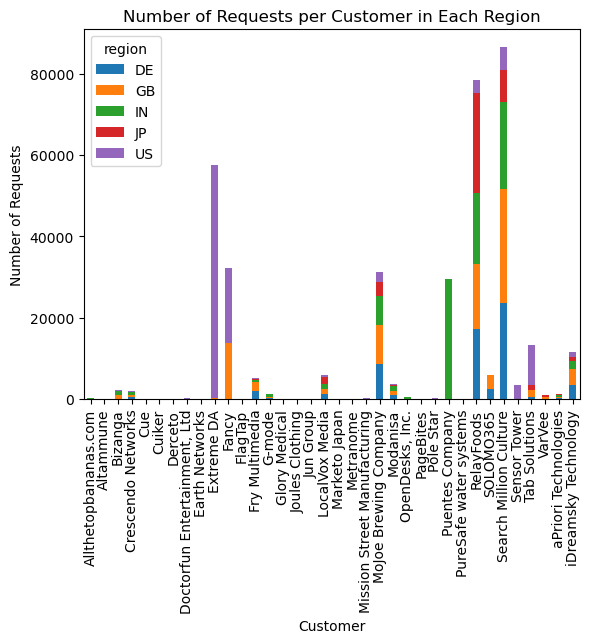

In [84]:
#29. Preset a WoW graph showing the number of requests per customer in each region (hint: use stacked bars), from it:

import matplotlib.pyplot as plt

# create a pivot table to get the number of requests per customer in each region
pt = pd.pivot_table(ad_recs_annotated, values='is_success', index=['requester'], columns=['region'], aggfunc='count', fill_value=0)

# plot a stacked bar chart
pt.plot(kind='bar', stacked=True)

# add labels and title
plt.xlabel('Customer')
plt.ylabel('Number of Requests')
plt.title('Number of Requests per Customer in Each Region')

# show the plot
plt.show()

In [ ]:
#30. Identify major traffic shape changes (addition/removal) of major clients
# To identify major traffic shape changes (addition/removal) of major clients, you can look for any significant changes in the height and distribution of the bars for each customer over time. If a customer's bar suddenly becomes much taller or shorter, or if the distribution of the bars changes significantly, it could indicate a change in the amount or distribution of requests from that customer.

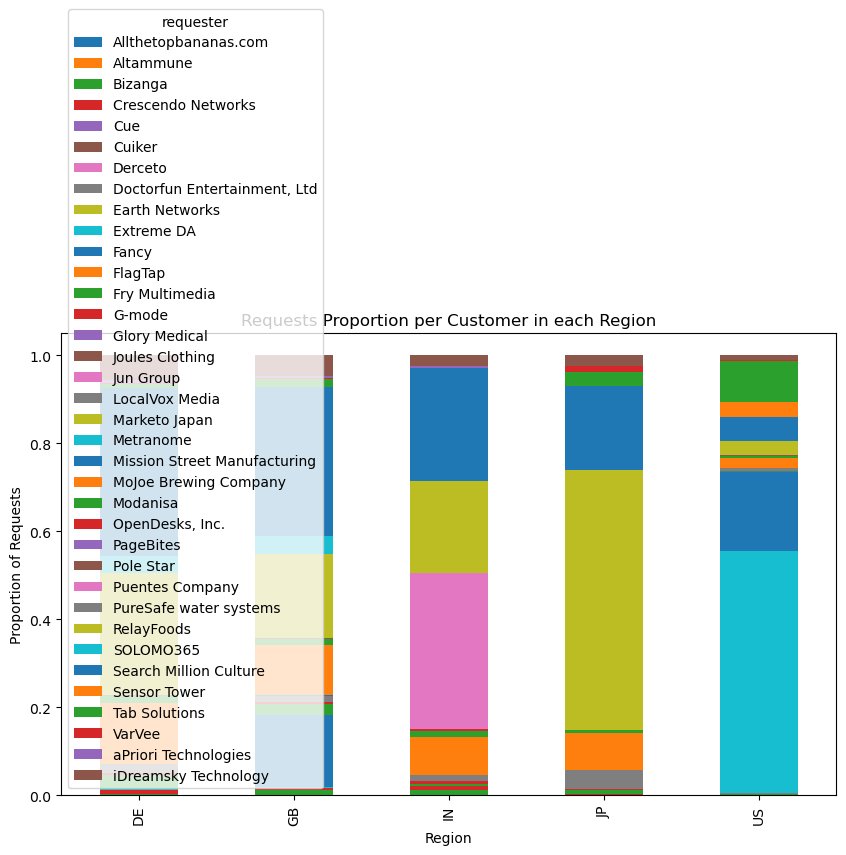

In [87]:
#31. Preset a WoW graph showing the requests proportion per customer in each region (hint: use stacked bars), from it:

# group the data by region and requester, and count the number of requests
grouped = ad_recs_annotated.groupby(['region', 'requester']).size().reset_index(name='count')

# calculate the total number of requests per region
totals = grouped.groupby('region')['count'].transform('sum')

# calculate the proportion of requests per customer in each region
grouped['proportion'] = grouped['count'] / totals

# pivot the table to create a stacked bar chart
pivot = grouped.pivot(index='region', columns='requester', values='proportion')

# plot the stacked bar chart
ax = pivot.plot(kind='bar', stacked=True, figsize=(10, 6))

# set the labels and title
ax.set_xlabel('Region')
ax.set_ylabel('Proportion of Requests')
ax.set_title('Requests Proportion per Customer in each Region')

# show the plot
plt.show()

In [ ]:
#32. Identify major traffic shape changes (addition/removal) of major clients
# To identify major traffic shape changes (addition/removal) of major clients, you can look for any significant changes in the proportion of requests for a particular customer in a region over time. If the proportion of requests for a customer suddenly increases or decreases significantly, that could indicate a major traffic shape change.

Analysis Bonus questions:
1. Compute the per region success rate and CI in trailing weeks, Say, 4 weeks instead of 1 week - to allow for smoother estimations and smaller CIs

In [97]:
import numpy as np

# create a copy of the dataframe and convert is_success to numeric
df = ad_recs_annotated.copy()
df['is_success'] = pd.to_numeric(df['is_success'], errors='coerce')

# group by region and week_id, compute the number of successes and total trials
grouped = df.groupby(['region', 'week_id']).agg({'is_success': ['sum', 'count']})
grouped.columns = ['num_success', 'num_trials']

# filter out rows with no data
grouped = grouped[grouped['num_trials'] > 0]

# compute the success rate and standard error
grouped['success_rate'] = grouped['num_success'] / grouped['num_trials']
grouped['standard_error'] = np.sqrt(grouped['success_rate'] * (1 - grouped['success_rate']) / grouped['num_trials'])

# compute the confidence interval using the binomial distribution
alpha = 0.05  # significance level
z = 1.96  # 95% confidence interval
grouped['lower_ci'] = binom.ppf(alpha/2, grouped['num_trials'], grouped['success_rate']) / grouped['num_trials']
grouped['upper_ci'] = binom.ppf(1-alpha/2, grouped['num_trials'], grouped['success_rate']) / grouped['num_trials']

# create a new dataframe for trailing 4 weeks
trailing_4_weeks = grouped.groupby('region').apply(lambda x: x.iloc[-4:])

# display the result
print(trailing_4_weeks)

Empty DataFrame
Columns: [num_success, num_trials, success_rate, standard_error, lower_ci, upper_ci]
Index: []
Empty DataFrame
Columns: [num_success, num_trials, success_rate, standard_error, lower_ci, upper_ci]
Index: []


### Compactization

In [100]:
ad_recs_annotated['ad_count'] = ad_recs_annotated.groupby('ad_id')['ad_id'].transform('count')
ad_recs_annotated.drop_duplicates(subset='ad_id', inplace=True)
ad_recs_annotated

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,ad_count
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,1
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY,1
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,NaN,Qality,DNNQ,1
3,2021-week_33,AD89608808,Search Million Culture,DE,yes,NaN,Qality,BooksQ,1
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,NaN,Qality,DNNQ,1
...,...,...,...,...,...,...,...,...,...
373781,2022-week_52,AD08ZYGHP6,Extreme DA,US,yes,NaN,Yield,DNNY,1
373782,2022-week_52,AD07RXYDM8,Extreme DA,US,yes,NaN,Yield,XGBY,1
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,yes,NaN,Yield,DNNY,1
373785,2022-week_52,AD096LRR88,Extreme DA,US,yes,NaN,Yield,DNNY,1


* Are there duplicated ads? To compac the data, remove duplicated ads and instead add an ad_count column **(pay attention, this is not trivial at all)**

In [101]:
ad_recs_annotated['ad_count'] = ad_recs_annotated.groupby('ad_id')['ad_id'].transform('count')
ad_recs_annotated.drop_duplicates(subset='ad_id', inplace=True)

,week_id,ad_id,requester,region,is_success,is_sever,recommendation_type,rec_provider,ad_count
0,2021-week_33,AD0088VOS,Search Million Culture,DE,yes,NaN,Qality,DNNQ,1
1,2021-week_33,AD07KYS8JM,MoJoe Brewing Company,DE,yes,NaN,Yield,DNNY,1
2,2021-week_33,AD08PDP6Y9,Search Million Culture,DE,yes,NaN,Qality,DNNQ,1
3,2021-week_33,AD89608808,Search Million Culture,DE,yes,NaN,Qality,BooksQ,1
4,2021-week_33,AD07CMVHP6,Search Million Culture,DE,yes,NaN,Qality,DNNQ,1
...,...,...,...,...,...,...,...,...,...
373781,2022-week_52,AD08ZYGHP6,Extreme DA,US,yes,NaN,Yield,DNNY,1
373782,2022-week_52,AD07RXYDM8,Extreme DA,US,yes,NaN,Yield,XGBY,1
373783,2022-week_52,AD08KQ8GDG,Extreme DA,US,yes,NaN,Yield,DNNY,1
373785,2022-week_52,AD096LRR88,Extreme DA,US,yes,NaN,Yield,DNNY,1


### Merges and joins

The Wow samples and annotations task were sent and recieve seperatly, per each week. The dataset you were working on was constructed from those files. You can see the files under the `data/weekly` folder, here are the first 10 files:

In [104]:
import os
weekly_files = os.listdir('data/weekly/')
sorted(weekly_files)[:10]

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'data/weekly/'

Your task is to reconstruct the dataset above. 

### Visualizations

Produce the following success rate graph per region:

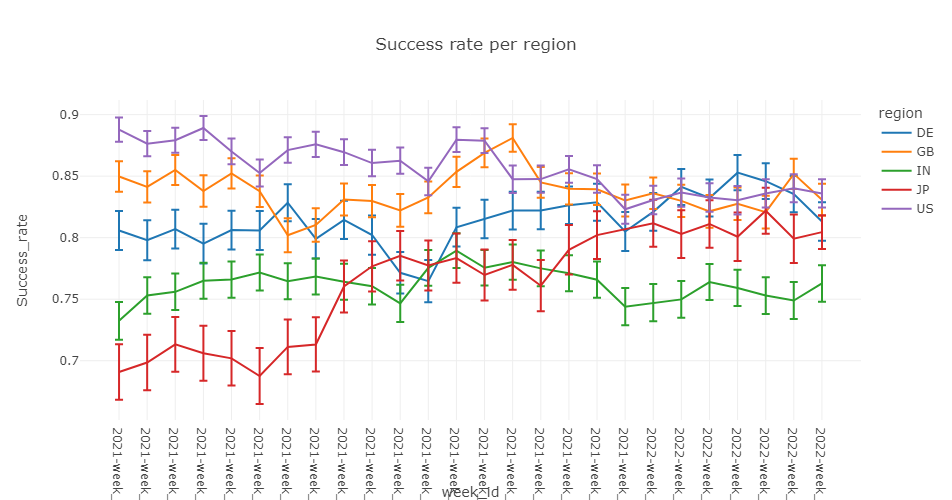

<AxesSubplot:xlabel='region'>

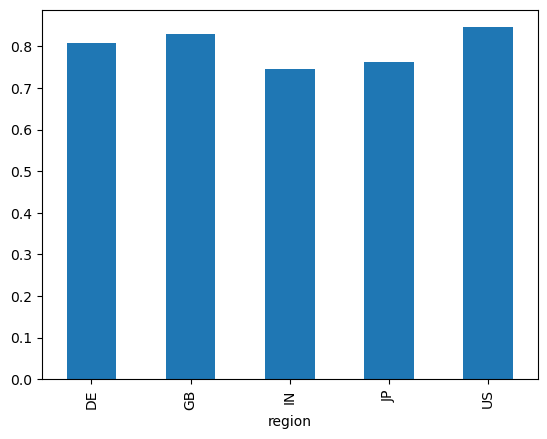

In [108]:
ad_recs_annotated['is_success'] = ad_recs_annotated['is_success'].replace({'yes': 1, 'no': 0})
success_rates = ad_recs_annotated.groupby('region')['is_success'].mean()
success_rates.plot(kind='bar')

Produce the following requestser proportion graph:

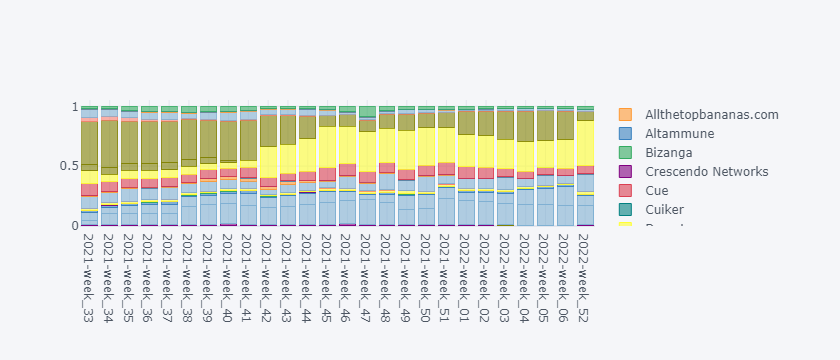

## Appendix

Code to create weekly files:

In [109]:
# for l in ad_recs_annotated.region.unique():
#     for w in ad_recs_annotated.week_id.unique():
#         w_id = w.split('_')[1]
#         y = w.split('-')[0]
#         query = f'week_id == "{w}" and region == "{l}"'
#         sample_f_name = f'{y}_{w_id}_{l}__Sample.csv'
#         ad_recs_annotated.query(query)[['week_id','ad_id','requester','region','recommendation_type', 'rec_provider']].to_csv(f'data/weekly/{sample_f_name}', index=False)
#         for s in ad_recs_annotated.recommendation_type.unique():
#             ann_f_name = f'{y}_{w_id}_{l}_{s}_annotation_result.csv'
#             query = f'week_id == "{w}" and region == "{l}" and recommendation_type == "{s}"'
#             sss = ad_recs_annotated.query(query)
#             if sss.empty:
#                 continue            
#             sss[['region','ad_id','is_success','is_sever']].drop_duplicates(subset=['ad_id']).to_csv(f'data/weekly/{ann_f_name}', index=False)